# HW 2. 
Implementation of Logistic Regression with Matrix multiplication approach 

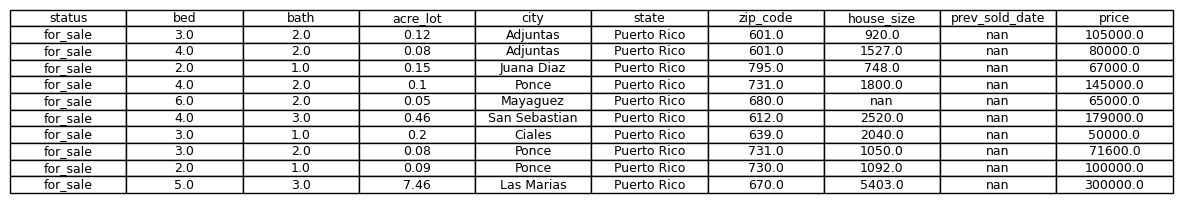

In [69]:
import matplotlib.pyplot as plt
from src.dataset_service import read_zip_csv

real_estate_path = "./data/realtor_data_usa.csv.zip"
df = read_zip_csv(csv_path=real_estate_path, num_lines=10)

fig, ax = plt.subplots(figsize=(15, 2))  # Adjust figsize as necessary
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.show()

### Task 1
1. Update the next code for implementation Multiply Linear Regression based on Matrixes multiplication.
2. Compare performance based on Matrices Multiplication with curent ipmlementation. 

In [10]:
import math
import numpy as np
from src.dataset_service import read_zip_csv

# Read data
real_estate_path = "./data/realtor_data_usa.csv.zip"
df = read_zip_csv(csv_path=real_estate_path, num_lines=700)
# Create separated dataset and drop all nan
new_df = df[['bed', 'bath', 'house_size', 'price']]
new_df = new_df.dropna()


def normalize(feature):
    # Calculate the mean (average) of the feature values.
    # 'sum(feature)' computes the total sum of the feature values.
    # 'len(feature)' gives the number of values in the feature.
    mean = sum(feature) / len(feature)
    
    # Calculate the standard deviation (std) of the feature values.
    # 1. For each value xi in the feature, we compute (xi - mean)^2 which represents the squared difference 
    #    between the value and the mean. This helps measure the spread of the data.
    # 2. 'sum([(xi - mean) ** 2 for xi in feature])' computes the total sum of these squared differences.
    # 3. Dividing by 'len(feature)' gives the variance (mean of the squared differences).
    # 4. Taking the square root of the variance gives the standard deviation.
    std = math.sqrt(sum([(xi - mean) ** 2 for xi in feature]) / len(feature))
    
    # Normalize each value in the feature using Z-score normalization.
    # For each value xi in the feature, we subtract the mean and then divide by the standard deviation.
    # This process scales the values such that the feature has a mean of 0 and a standard deviation of 1.
    # This is particularly useful in many machine learning algorithms to ensure that all features have 
    # the same scale.
    return [(xi - mean) / std for xi in feature]

#TODO implement matrix for the X features 
x1 = normalize(new_df['bed'].values)
x2 = normalize(new_df['bath'].values)
x3 = normalize(new_df['house_size'].values)
y = normalize(new_df['price'].values)

#for test
#x1 = [2,4,6,8,10,12,14,16,18,20]
#x2 = [12,14,16,18,110,112,114,116,118,120]
#x3 = [2,4,6,8,10,12,14,16,18,20]
#y = [1,2,3,4,5,6,7,8,9,10]

print("bed ->", x1[:10])
print("bath -> ", x2[:10])
print("house_size -> ", x3[:10])
print("target y -> ", y[:10])


def compute_mse(w1, w2, w3, b, x1, x2, x3, y):
    """Compute the Mean Squared Error."""
    #TODO add detailed comments with explanation of your algorithm implementation
    n = len(x1)
    total_error = sum((y[i] - (w1*x1[i] + w2*x2[i] + w3*x3[i] + b))**2 for i in range(n))
    mse = total_error / n
    return mse 

def compute_gradients(w1, w2, w3, b, x1, x2, x3, y):
    n = len(y)
    
    total_gradient_w1 = 0
    total_gradient_w2 = 0
    total_gradient_w3 = 0
    total_gradient_b = 0
    
    #TODO add detailed comments with explanation of your algorithm implementation
    for i in range(n):
        #TODO implement me 
        predicted_y = w1*x1[i] + w2*x2[i] + w3*x3[i] + b
        difference = y[i] - predicted_y
        
        total_gradient_w1 -= x1[i] * difference
        total_gradient_w2 -= x2[i] * difference
        total_gradient_w3 -= x3[i] * difference
        total_gradient_b -= difference

    dw1 = (-2/n) * total_gradient_w1
    dw2 = (-2/n) * total_gradient_w2
    dw3 = (-2/n) * total_gradient_w3
    db = (-2/n) * total_gradient_b
    
    return dw1, dw2, dw3, db

def gradient_descent(x1, x2, x3, y, w1_init, w2_init, w3_init, b_init, learning_rate, num_iterations):
    w1, w2, w3, b = w1_init, w2_init, w3_init, b_init
    mse_history = []
    #TODO add detailed comments with explanation of your algorithm implementation
    for i in range(num_iterations):
        dw1, dw2, dw3, db = compute_gradients(w1, w2, w3, b, x1, x2, x3, y)
        w1 += learning_rate * dw1
        w2 += learning_rate * dw2
        w3 += learning_rate * dw3
        b += learning_rate * db
        mse = compute_mse(w1, w2, w3, b, x1, x2, x3, y)
        mse_history.append(mse)
    
    return w1, w2, w3, b, mse_history


# Parameters
learning_rate = 0.0001
num_iterations = 20000

#TODO implement matrix for the W 
initial_w1 = 0.1
initial_w2 = 0.1
initial_w3 = 0.1
initial_b = 1

final_w1, final_w2, final_w3, final_b, mse_history = gradient_descent(x1, x2, x3, y, initial_w1, initial_w2, initial_w3, initial_b, learning_rate, num_iterations)

for i in range(0,len(mse_history),50):
    print("MSE:",mse_history[i])


bed -> [-0.5071936642977346, 0.08376727939758978, -1.0981546079930589, 0.08376727939758978, 0.08376727939758978, -0.5071936642977346, -0.5071936642977346, -1.0981546079930589, 0.6747282230929141, -0.5071936642977346]
bath ->  [-0.44219865583271734, -0.44219865583271734, -1.160597103005744, -0.44219865583271734, 0.27619979134030936, -1.160597103005744, -0.44219865583271734, -1.160597103005744, 0.27619979134030936, -0.44219865583271734]
house_size ->  [-0.7346923048195694, -0.41234423349168153, -0.82603310921561, -0.2673672590723844, 0.11498959653894876, -0.13991497386860668, -0.6656556503341897, -0.6433515004235286, 1.6460101725493286, -0.6359167837866416]
target y ->  [-0.3188799969366907, -0.33607519988287415, -0.34501670541488955, -0.2913676722227972, -0.2679821962159877, -0.3567094434182943, -0.3418527880727918, -0.3223190375259274, -0.1847574139564598, -0.3298849268222481]
MSE: 1.8776893149111358
MSE: 1.8558942184955793
MSE: 1.8345294903399691
MSE: 1.8135862604553972
MSE: 1.7930558

### Plot the results

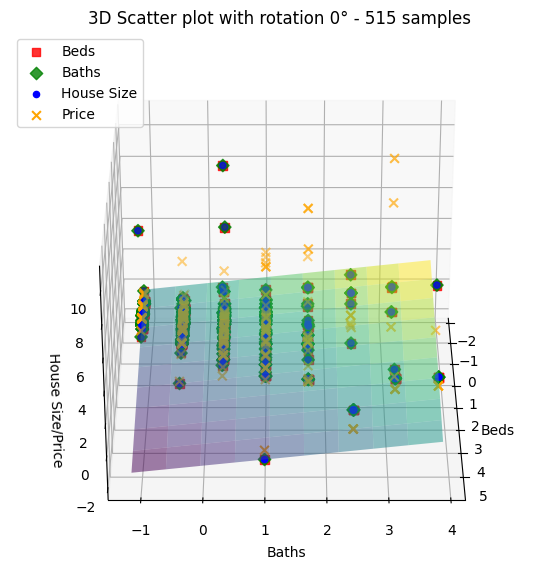

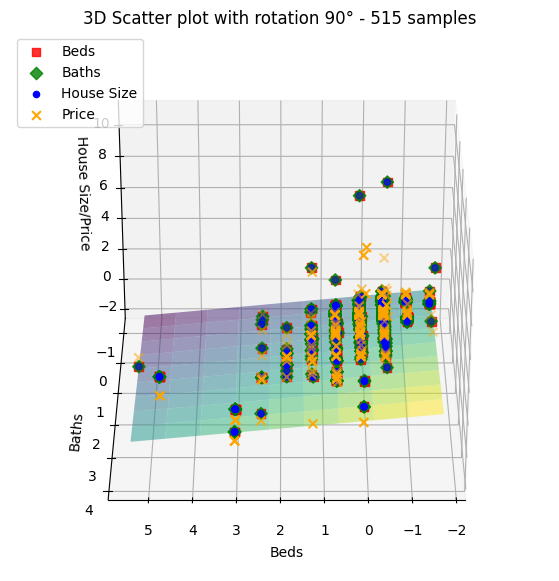

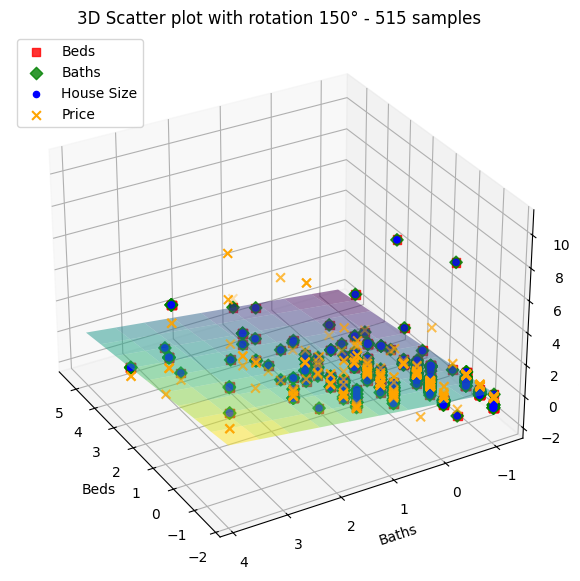

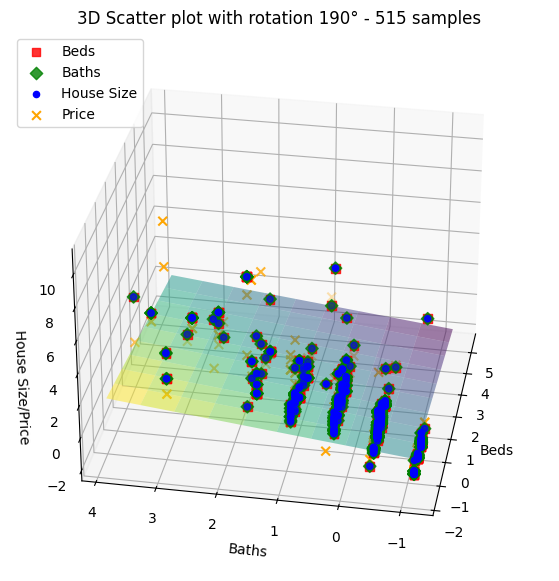

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_results(x1, x2, x3, y, final_w1, final_w2, final_w3, final_b):
    # Define a colormap with four colors: red, green, blue, orange
    colors = ['red', 'green', 'blue', 'orange']
    cmap_name = 'custom_div_cmap'
    cm = ListedColormap(colors, name=cmap_name, N=None)

    viewpoints = [0, 90, 150, 190]  # Four different rotation angles for demonstration

    num_samples = len(x1)  # Compute the number of samples

    for view in viewpoints:
        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot of the actual data for Beds, Baths, House Size, and Price
        ax.scatter(x1, x2, x3, c='red', marker='s', s=40, alpha=0.8, label='Beds') # Square marker
        ax.scatter(x1, x2, x3, c='green', marker='D', s=40, alpha=0.8, label='Baths') # Diamond marker
        ax.scatter(x1, x2, x3, c='blue', marker='o', s=20, label='House Size')
        ax.scatter(x1, x2, y, c='orange', marker='x', s=40, label='Price')

        # Create a meshgrid for the plane
        x1_range = np.linspace(min(x1), max(x1), 10)
        x2_range = np.linspace(min(x2), max(x2), 10)
        x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
        x3_pred = final_w1 * x1_grid + final_w2 * x2_grid + final_b

        # Plot the regression plane
        ax.plot_surface(x1_grid, x2_grid, x3_pred, alpha=0.5, cmap='viridis', shade=True)

        ax.set_xlabel('Beds')
        ax.set_ylabel('Baths')
        ax.set_zlabel('House Size/Price')

        ax.legend(loc='upper left')  # Display legend

        # Set the viewpoint rotation
        ax.view_init(elev=None, azim=view)

        plt.title(f"3D Scatter plot with rotation {view}° - {num_samples} samples")
        plt.show()

# Sample call (replace with your data and weights)
plot_results(x1, x2, x3, y, final_w1, final_w2, final_w3, final_b)


### Task 2
Provide implementation with sklearn see https://scikit-learn.org/stable/ for the dataset -  "./data/realtor_data_usa.csv.zip"

1. investigate dataset and select the most important features
2. Implement Multiple Linear Regression with scikit-learn  